# Decision Tree Classifier

## Importing the basic libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as ms

## Importing dataset

In [2]:
data = pd.read_csv('diabetes2.csv')

### Analyze data

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
data.shape

(768, 9)

### Visualizing the data

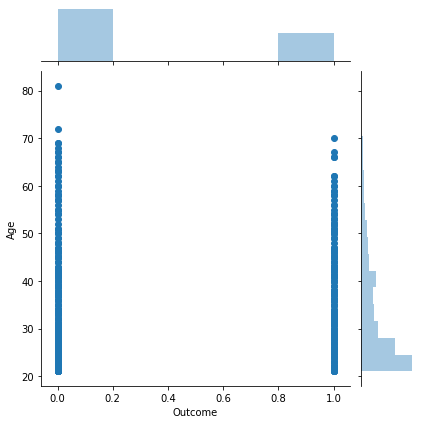

In [9]:
sns.jointplot(x='Outcome',y='Age',data=data)

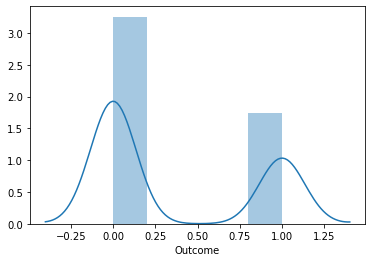

In [10]:
sns.distplot(data['Outcome'])

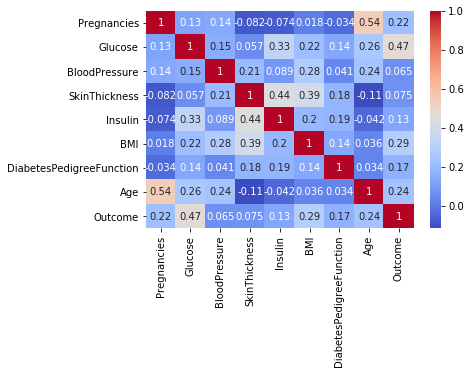

In [11]:
sns.heatmap(data.corr(),annot=True,cmap="coolwarm")

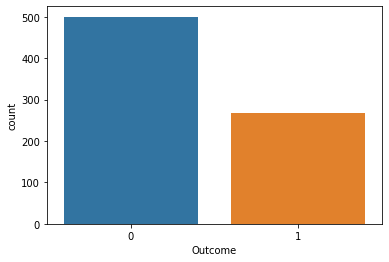

In [12]:
sns.countplot(data['Outcome'])

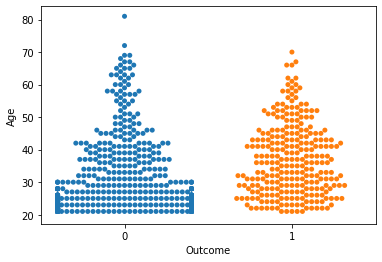

In [13]:
sns.swarmplot(x='Outcome',y='Age',data=data)

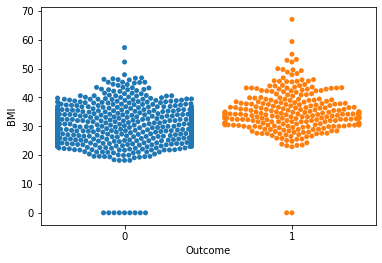

In [14]:
sns.swarmplot(x='Outcome',y='BMI',data=data)

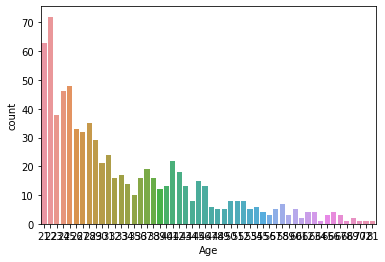

In [15]:
sns.countplot(data['Age'])

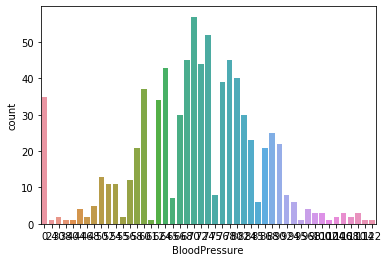

In [16]:
sns.countplot(data['BloodPressure'])

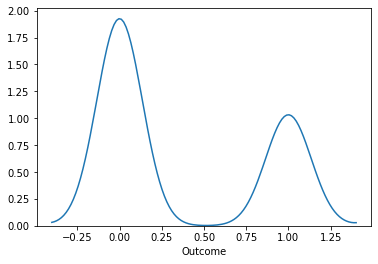

In [17]:
sns.distplot(data['Outcome'],hist=False)

### Cleaning data

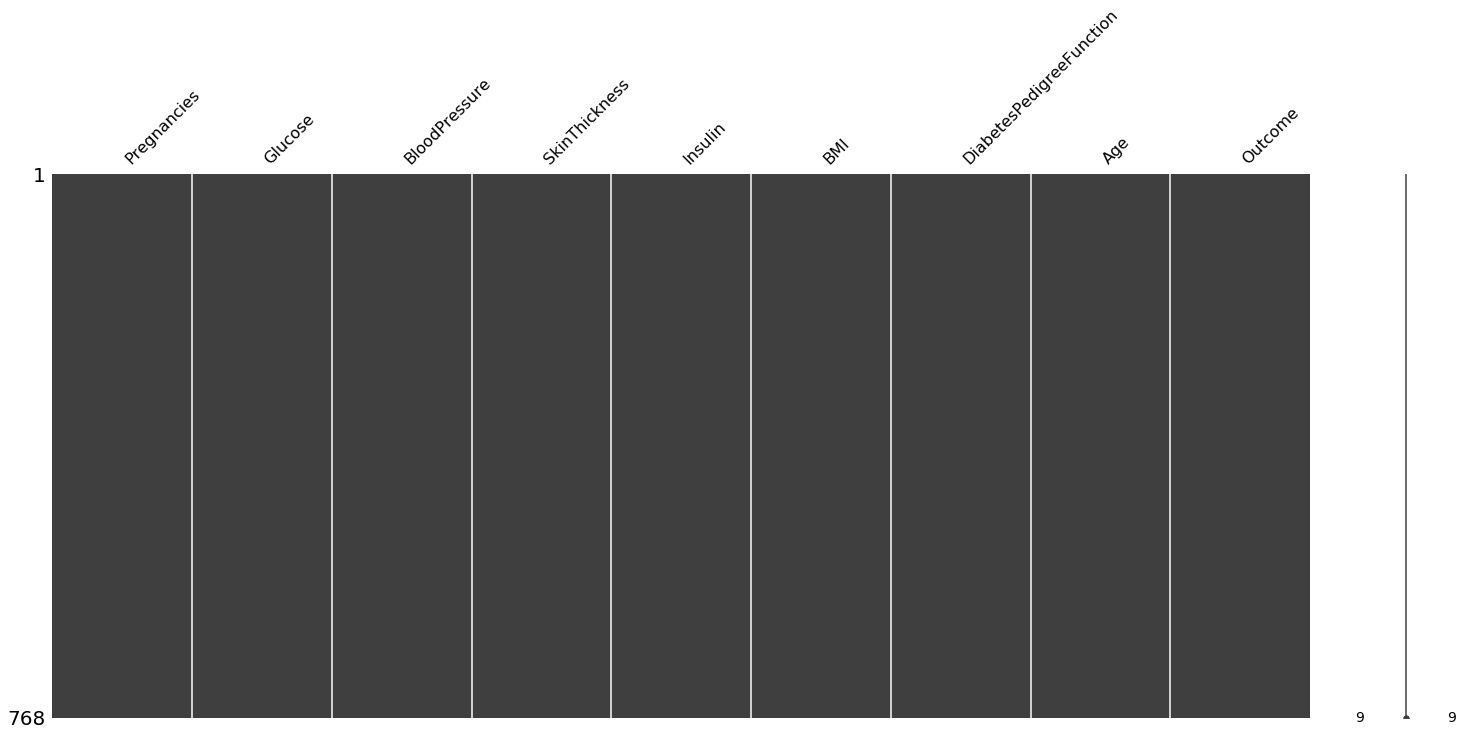

In [18]:
ms.matrix(data)

### Categorical Conversion

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [20]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [21]:
x = data.drop('Outcome',axis=1)
y = data['Outcome']

In [22]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


## train_test_split

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.3,random_state=101)

In [24]:
print(X_train)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
711            5      126             78             27       22  29.6   
58             0      146             82              0        0  40.5   
216            5      109             62             41      129  35.8   
168            4      110             66              0        0  31.9   
658           11      127            106              0        0  39.0   
..           ...      ...            ...            ...      ...   ...   
75             1        0             48             20        0  24.7   
599            1      109             38             18      120  23.1   
575            1      119             44             47       63  35.5   
337            5      115             76              0        0  31.2   
523            9      130             70              0        0  34.2   

     DiabetesPedigreeFunction  Age  
711                     0.439   40  
58                      1.781   44  


In [25]:
print(X_test)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
766            1      126             60              0        0  30.1   
748            3      187             70             22      200  36.4   
42             7      106             92             18        0  22.7   
485            0      135             68             42      250  42.3   
543            4       84             90             23       56  39.5   
..           ...      ...            ...            ...      ...   ...   
188            8      109             76             39      114  27.9   
8              2      197             70             45      543  30.5   
645            2      157             74             35      440  39.4   
381            0      105             68             22        0  20.0   
314            7      109             80             31        0  35.9   

     DiabetesPedigreeFunction  Age  
766                     0.349   47  
748                     0.408   36  


In [26]:
print(Y_train)

711    0
58     0
216    1
168    0
658    0
      ..
75     0
599    0
575    0
337    1
523    1
Name: Outcome, Length: 537, dtype: int64


In [27]:
print(Y_test)

766    1
748    1
42     0
485    1
543    0
      ..
188    1
8      1
645    0
381    0
314    1
Name: Outcome, Length: 231, dtype: int64


## Feature Scaling

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [29]:
print(X_train)

[[ 0.36600141  0.16458732  0.45036901 ... -0.32829909 -0.11986593
   0.55832698]
 [-1.13432499  0.79409863  0.66453607 ...  1.0575606   4.14590502
   0.892297  ]
 [ 0.36600141 -0.3704973  -0.40629925 ...  0.45998808  0.11853409
  -0.6940606 ]
 ...
 [-0.83425971 -0.05574164 -1.37005104 ...  0.42184515 -0.62527396
  -0.6940606 ]
 [ 0.36600141 -0.18164391  0.34328548 ... -0.12487014 -0.42501795
   0.892297  ]
 [ 1.56626254  0.29048958  0.02203488 ...  0.25655913  0.55719012
   0.9757895 ]]


In [30]:
print(X_test)

[[-0.83425971  0.16458732 -0.51338278 ... -0.26472754 -0.40594595
   1.14277451]
 [-0.23412915  2.08459684  0.02203488 ...  0.53627393 -0.2184046
   0.22435696]
 [ 0.96613198 -0.464924    1.19995374 ... -1.20558641 -0.76831397
   1.22626702]
 ...
 [-0.53419443  1.14032986  0.23620194 ...  0.9177032  -1.08935933
  -0.27659808]
 [-1.13432499 -0.49639957 -0.08504865 ... -1.54887276 -0.76513531
  -0.94453812]
 [ 0.96613198 -0.3704973   0.55745254 ...  0.47270239  2.06705688
   0.80880449]]


### Training the dataset

In [32]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy',random_state=101)
classifier.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=101, splitter='best')

## Predicting the test results

In [33]:
y_pred = classifier.predict(X_test)

### Results 

In [34]:
y_pred = np.array(y_pred)
Y_test = np.array(Y_test)

In [35]:
print(np.concatenate((Y_test.reshape(len(Y_test),1),y_pred.reshape(len(y_pred),1)),1))

[[1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]

In [36]:
print(classifier.predict_proba(sc.transform([[1,85,66,29,0,26.6,0.351,31]])))

[[1. 0.]]


In [37]:
print(classifier.predict(sc.transform([[1,85,66,29,0,26.6,0.351,31]])))

[0]


### Confusion_Matrix and Accuracy_Score

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix
print("accuracy_score: ",accuracy_score(Y_test,y_pred))
print("confusion_matrix: ",confusion_matrix(Y_test,y_pred))

accuracy_score:  0.7705627705627706
confusion_matrix:  [[123  27]
 [ 26  55]]
